In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Wf = 1.0                    # dynamics weight
Wi = 1.0                    # initial condition weight
Wb = 1.0                    # boundary condition weight
w  = 1.0                    # data weight

M = 100                     # Number of data points

In [6]:
# Random data at random places
xm = np.random.rand(M)         # M random space points
tm = np.random.rand(M)         # M random time points...
dm = np.random.randn(M)        # random data about zero

# model parameters
T = 1.0
X = 1.0
dx = 0.01;                  # spatial resolution
dt = 0.01;                  # time step
c  = dx/dt;                 # phase speed (stable/no diffusion)
t = np.arange(0, T+dt, dt)     # number of t points
N = len(t)
x = np.arange(0, X+dx, dx)     # number of x points
L = len(x)
xmi = np.ceil(xm/dx);          # map data to closest x-point index
tmi = np.ceil(tm/dt);          # map data to closest t-point index
fac = dt*c/dx;

# initialize arrays
alpha = np.zeros((M, L, N), dtype='d')
r = np.zeros((M, L, N), dtype='d')

In [9]:
for m in range(M):                  # find representer for each data point
    # backward model
    for n in range(N-1, 0, -1):     # alpha already zero at x=X and t=T
        alpha[m,:-1,n-1]=alpha[m,:-1,n] + fac*(np.diff(alpha[m,:,n]))
        if (tmi[m]==(n-1)):                 # if time of observation m
            alpha[m,xmi[m],n-1] = 1 / dx    # add spike [actually, dt/(dx*dt)]
    # forward model
    r[m,:,0] = alpha[m,:,0]/Wi;             # initial conditions
    r[m,0,:] = c*alpha[m,0,:]/Wb;           # boundary conditions
    for n in range(1, N):
        r[m,1:,n] = r[m,1:,n-1] - fac*(np.diff(r[m,:,n-1])) + \
                    dt*alpha[m,1:,n]/Wf

In [11]:
# Construct R (the order is irrelevant, since R.transpose() = R).
R = np.empty((M, M), dtype='d')
for m in range(M):
    for mm in range(M):
        R[m,mm] = r[m, xmi[mm], tmi[mm]]

In [14]:
# calculate uhat (with u_F == 0)
uhat = np.dot( np.dot(dm, np.linalg.inv(R+np.eye(M)/w)), r.reshape(M, -1)).reshape(L, N)

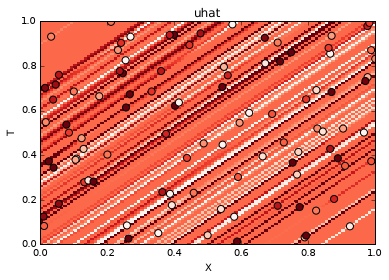

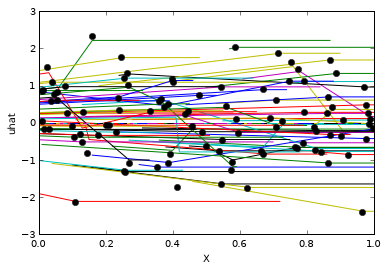

In [19]:
plt.figure()
tt, xx = np.meshgrid(t, x)
plt.pcolor(xx, tt, uhat, shading='flat', cmap=plt.cm.Reds, vmin=-1, vmax=1);
plt.scatter(xm, tm, 50, dm, cmap=plt.cm.Reds, vmin=-1, vmax=1)
plt.clim(-1, 1)
plt.gca().axis([0, 1, 0, 1])
plt.xlabel ('X')
plt.ylabel ('T')
plt.title ('uhat')

plt.figure()
for k in range(-100, 101):
    plt.plot(np.diag(xx, k=k), np.diag(uhat, k=k));
plt.plot(xm,dm,'ko');
plt.xlabel ('X');
plt.ylabel ('uhat');

plt.show()
